In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
file_path = '/content/loan_data.csv'
data = pd.read_csv(file_path)

# i) Data shape and correlation heatmap
print("Data Shape:", data.shape)


Data Shape: (9578, 14)


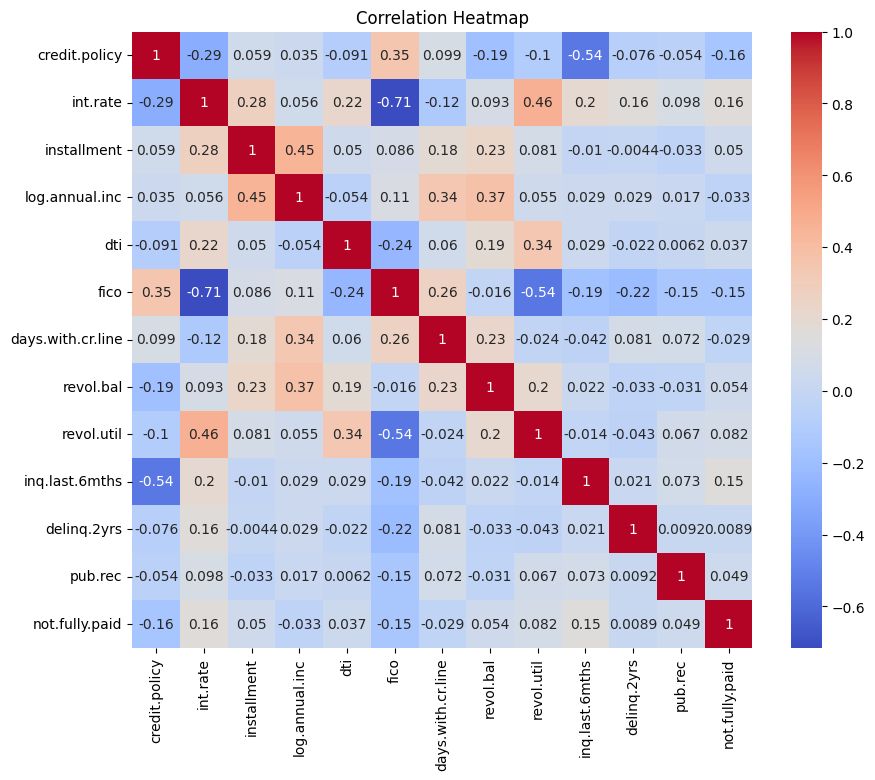

In [4]:
numeric_data = data.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

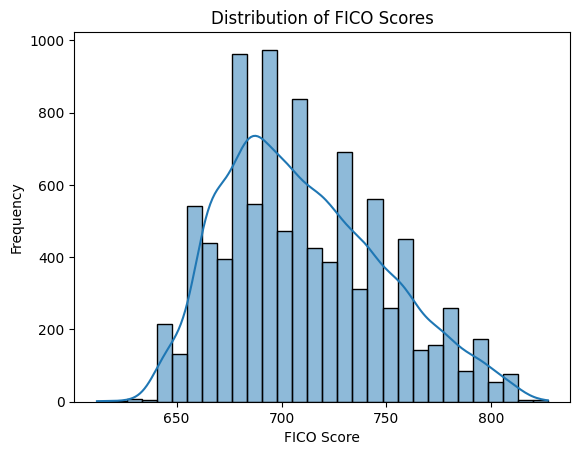

In [5]:

sns.histplot(data['fico'], kde=True, bins=30)
plt.title("Distribution of FICO Scores")
plt.xlabel("FICO Score")
plt.ylabel("Frequency")
plt.show()

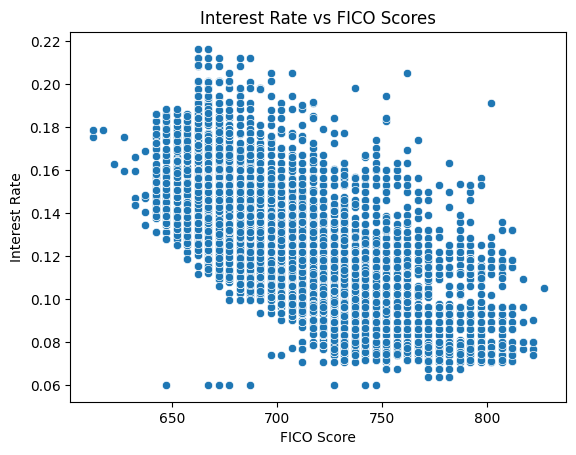

In [6]:

sns.scatterplot(x='fico', y='int.rate', data=data)
plt.title("Interest Rate vs FICO Scores")
plt.xlabel("FICO Score")
plt.ylabel("Interest Rate")
plt.show()

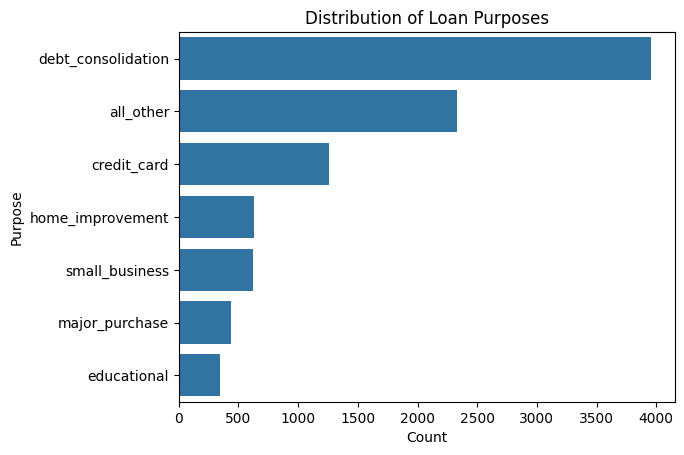

In [7]:
sns.countplot(y='purpose', data=data, order=data['purpose'].value_counts().index)
plt.title("Distribution of Loan Purposes")
plt.xlabel("Count")
plt.ylabel("Purpose")
plt.show()


In [8]:
average_dti = data['dti'].mean()
median_dti = data['dti'].median()
print(f"Average DTI: {average_dti:.2f}, Median DTI: {median_dti:.2f}")


Average DTI: 12.61, Median DTI: 12.66


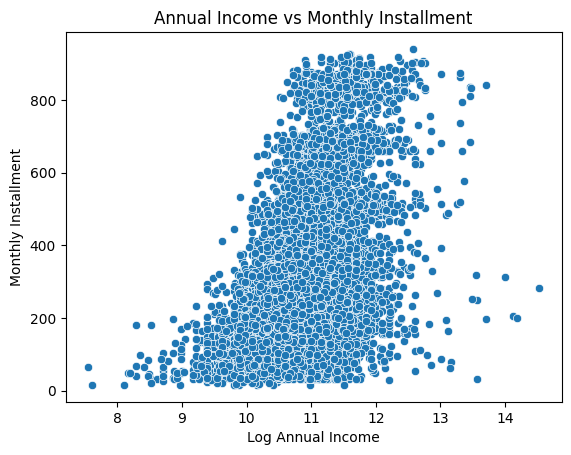

In [9]:
sns.scatterplot(x='log.annual.inc', y='installment', data=data)
plt.title("Annual Income vs Monthly Installment")
plt.xlabel("Log Annual Income")
plt.ylabel("Monthly Installment")
plt.show()


In [10]:
not_fully_paid_ratio = data['not.fully.paid'].mean()
print(f"Proportion of loans not fully paid: {not_fully_paid_ratio:.2%}")


Proportion of loans not fully paid: 16.01%


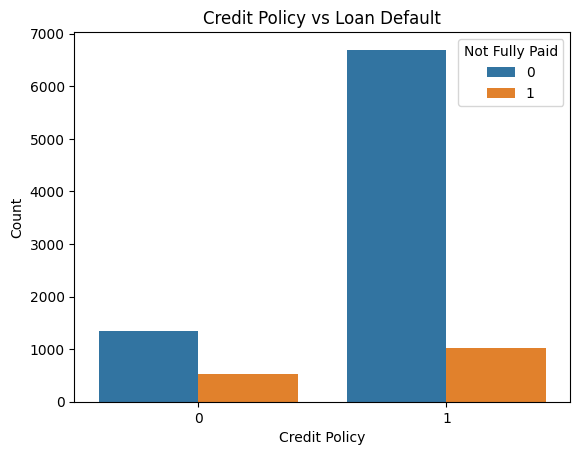

In [11]:
sns.countplot(x='credit.policy', hue='not.fully.paid', data=data)
plt.title("Credit Policy vs Loan Default")
plt.xlabel("Credit Policy")
plt.ylabel("Count")
plt.legend(title="Not Fully Paid")
plt.show()


In [12]:
default_proportions = data.groupby('purpose')['not.fully.paid'].mean().sort_values(ascending=False)
print("Default Proportions by Purpose:")
print(default_proportions)


Default Proportions by Purpose:
purpose
small_business        0.277868
educational           0.201166
home_improvement      0.170111
all_other             0.166023
debt_consolidation    0.152388
credit_card           0.115689
major_purchase        0.112128
Name: not.fully.paid, dtype: float64


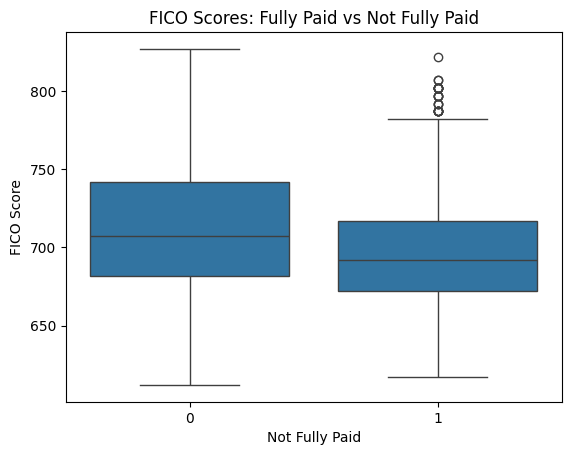

In [13]:
sns.boxplot(x='not.fully.paid', y='fico', data=data)
plt.title("FICO Scores: Fully Paid vs Not Fully Paid")
plt.xlabel("Not Fully Paid")
plt.ylabel("FICO Score")
plt.show()


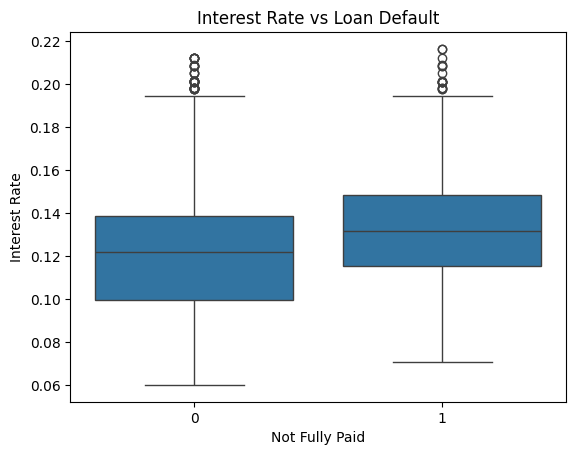

In [14]:
sns.boxplot(x='not.fully.paid', y='int.rate', data=data)
plt.title("Interest Rate vs Loan Default")
plt.xlabel("Not Fully Paid")
plt.ylabel("Interest Rate")
plt.show()


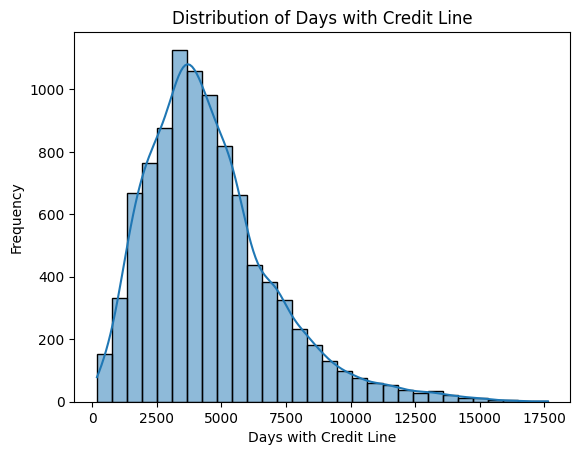

In [15]:
sns.histplot(data['days.with.cr.line'], kde=True, bins=30)
plt.title("Distribution of Days with Credit Line")
plt.xlabel("Days with Credit Line")
plt.ylabel("Frequency")
plt.show()



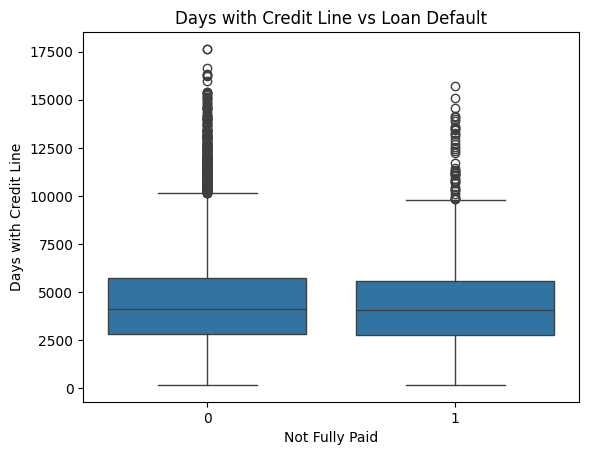

In [16]:
sns.boxplot(x='not.fully.paid', y='days.with.cr.line', data=data)
plt.title("Days with Credit Line vs Loan Default")
plt.xlabel("Not Fully Paid")
plt.ylabel("Days with Credit Line")
plt.show()


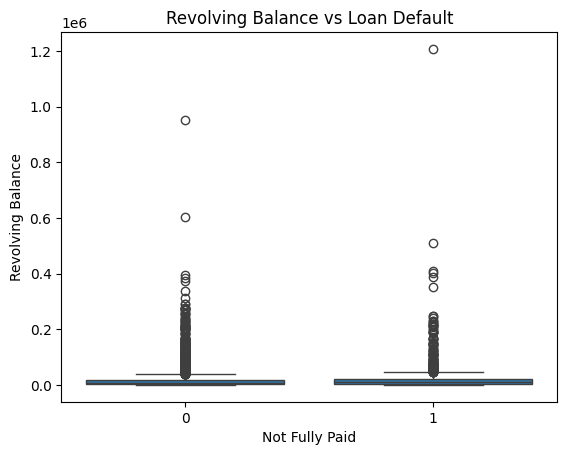

In [17]:

sns.boxplot(x='not.fully.paid', y='revol.bal', data=data)
plt.title("Revolving Balance vs Loan Default")
plt.xlabel("Not Fully Paid")
plt.ylabel("Revolving Balance")
plt.show()


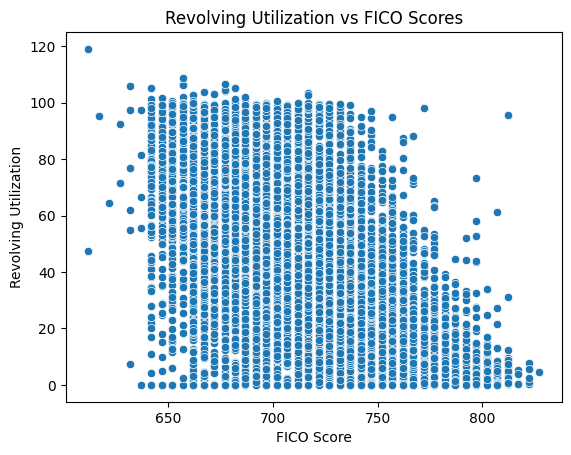

In [18]:
sns.scatterplot(x='fico', y='revol.util', data=data)
plt.title("Revolving Utilization vs FICO Scores")
plt.xlabel("FICO Score")
plt.ylabel("Revolving Utilization")
plt.show()


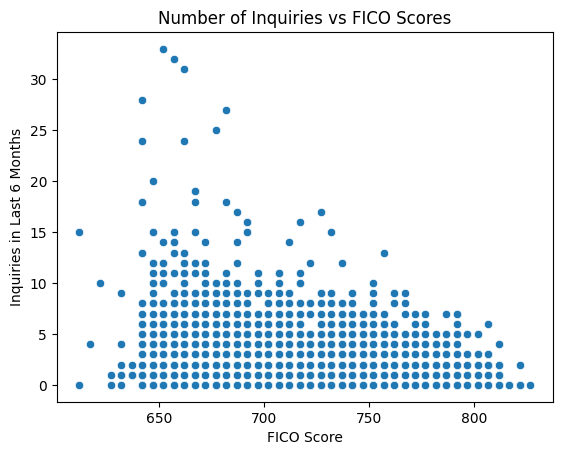

In [19]:
sns.scatterplot(x='fico', y='inq.last.6mths', data=data)
plt.title("Number of Inquiries vs FICO Scores")
plt.xlabel("FICO Score")
plt.ylabel("Inquiries in Last 6 Months")
plt.show()



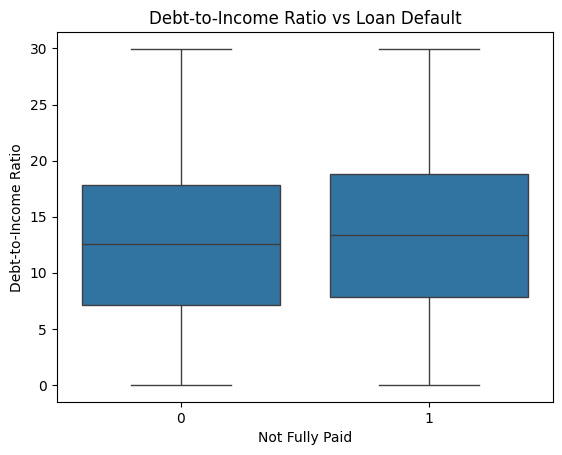

In [20]:
sns.boxplot(x='not.fully.paid', y='dti', data=data)
plt.title("Debt-to-Income Ratio vs Loan Default")
plt.xlabel("Not Fully Paid")
plt.ylabel("Debt-to-Income Ratio")
plt.show()


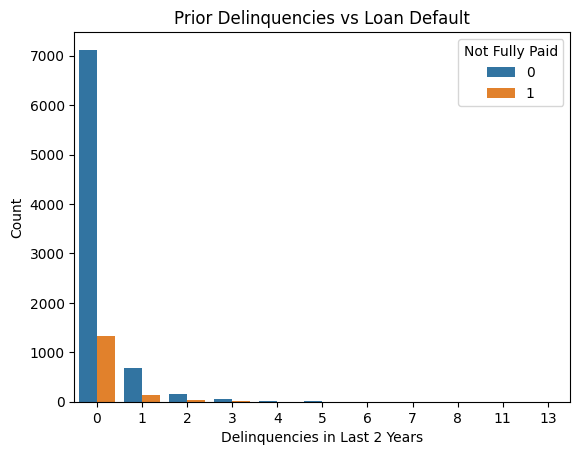

In [21]:
sns.countplot(x='delinq.2yrs', hue='not.fully.paid', data=data)
plt.title("Prior Delinquencies vs Loan Default")
plt.xlabel("Delinquencies in Last 2 Years")
plt.ylabel("Count")
plt.legend(title="Not Fully Paid")
plt.show()


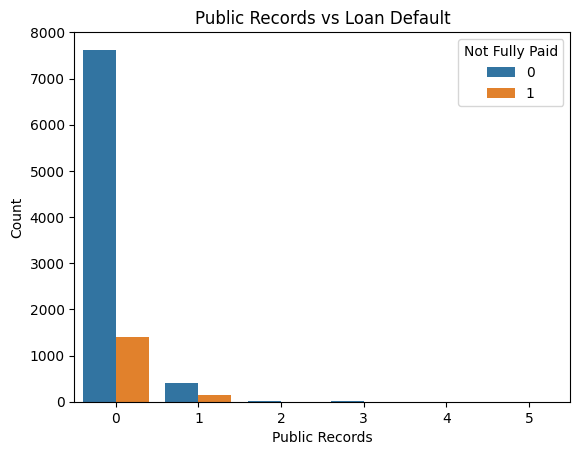

In [22]:
sns.countplot(x='pub.rec', hue='not.fully.paid', data=data)
plt.title("Public Records vs Loan Default")
plt.xlabel("Public Records")
plt.ylabel("Count")
plt.legend(title="Not Fully Paid")
plt.show()



In [23]:
purpose_stats = data.groupby('purpose').agg({'installment': ['mean'], 'int.rate': ['mean']})
print("Average Installment and Interest Rate by Purpose:")
print(purpose_stats)



Average Installment and Interest Rate by Purpose:
                   installment  int.rate
                          mean      mean
purpose                                 
all_other           244.937542  0.116771
credit_card         319.500713  0.119738
debt_consolidation  358.984390  0.126595
educational         217.547201  0.119907
home_improvement    337.071590  0.117507
major_purchase      243.483913  0.114171
small_business      433.826607  0.138087


In [24]:
purpose_dti = data.groupby('purpose')['dti'].mean().sort_values(ascending=False)
print("Loan Purposes with Higher Debt-to-Income Ratios:")
print(purpose_dti)


Loan Purposes with Higher Debt-to-Income Ratios:
purpose
credit_card           14.099398
debt_consolidation    14.076462
educational           11.344927
all_other             11.079498
small_business        10.793296
home_improvement      10.197504
major_purchase        10.159886
Name: dti, dtype: float64
